# Insect recognizer for farmer
Insect names 

1. aphids

2. fruit fly,

3. caterpillar,

4. colorado potato beetle,

5. leaf footed bugs,

6. grasshoper,

7. thrips,

8. mexican bean beetle,

9. leaf miners,

10. white flies,

11. mealy bug,

12. spider mites,

13. stink bug

In [ ]:
! pip install fastai
! pip install fastbook
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 10.5 MB/s eta 0:00:00


# Important Libraries

In [ ]:
from fastai.vision.all import load_learner
import gradio as gr
from fastai import *
import torch
import os
from PIL import Image

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/zip/models/model3-86%.pkl'
img_path = '/content/drive/MyDrive/Colab Notebooks/zip/insects/aphids/Black-Aphids.jpeg'

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/zip/insects'

names = []
for i in os.listdir(path):
  names.append(i)

names = names[::-1]

In [ ]:
def result(path):  
  
  pred,_,probability = model.predict(path)

  return {pred: float(probability.max())}

  


In [ ]:
model = load_learner(model_path)

In [ ]:
result(img_path)

{'aphids': 0.999387264251709}

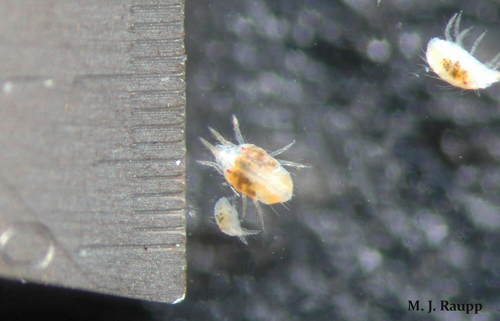

In [ ]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/zip/insects/spider mites/2ssmsizemjr1500.jpg')
img.to_thumb(500,500)


In [ ]:
model.predict('/content/drive/MyDrive/Colab Notebooks/zip/insects/spider mites/2ssmsizemjr1500.jpg')

('spider mites',
 TensorBase(9),
 TensorBase([1.2242e-06, 5.4246e-06, 6.4375e-06, 8.5257e-06, 4.3734e-08,
             4.9368e-07, 2.4805e-05, 5.6014e-06, 1.1435e-04, 9.8785e-01,
             1.1977e-02, 2.9441e-08, 9.2928e-06]))

# Gradio


In [ ]:
#test images 

path = '/content/drive/MyDrive/Colab Notebooks/zip/test_images/'

image_path = []

for i in os.listdir(path):
  image_path.append(path+i)


In [ ]:
image_path

['/content/drive/MyDrive/Colab Notebooks/zip/test_images/Mexican-Bean-Beetle-Organic-Control.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/mexican-bean-1-e1578430343596-1024x768.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/shutterstock_312547583.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/images349.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/whitefly-on-tomato-myanmar-eng-1.png',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/mopane_caterpillar.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/ter-insects-fruit-fly-article-2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/zip/test_images/RS6QRSBQF0BQLSMK301QO00K9KHKAKIKJ0VQJ04KJ08QD0QKD00K2KKKOK4KZS7KOK7KAK4KJ0AQOK.jpg']

# For deployable app

In [ ]:
image = gr.inputs.Image(shape =(128,128))
label = gr.outputs.Label()

iface = gr.Interface(fn=result, inputs=image, outputs=label, examples = image_path)
iface.launch(inline = False,share = True)


/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dbad5456-2e1d-4258.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
names

['aphids',
 'fruit fly',
 'caterpillar',
 'colorado potato beetle',
 'leaf footed bugs',
 'grasshoper',
 'thrips',
 'mexican bean beetle',
 'leaf miners',
 'white flies',
 'mealy bug',
 'spider mites',
 'stink bug']